In [121]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Cogsci 131 - Assignment 8

Selena Zhang

## Question 1

In [174]:
# building hypotheses
H1 = list(np.arange(0, 101, 2))
H2 = list(np.arange(1, 101, 2))
H3 = list([a**2 for a in np.arange(0, 11)])
H4 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
H5 = list(np.arange(5, 101, 5))
H6 = list(np.arange(10, 101, 10))
H7 = list(np.arange(1, 101))

In [195]:
def size_principle_likelihood(x, hypothesis):
    #x: a list of numbers that you input
    #check that these are the correct types
    array = []
    likelihood = 1/len(hypothesis)
    #adds a likelihood to the array if it's in there
    for j in x:
        if j in hypothesis:
            array.append(likelihood)
        else:
            array.append(0)
    #multiply all numbers together
    product = np.prod(array)
    return product
#test
size_principle_likelihood([2], H7)

0.01

If the number is inside the hypothesis, then the likelihood is 1 divided by the length of the hypothesis. If x is not in the hypothesis, then the function just returns 0 to signal that there is no probability. If there is an empty list, the probability comes back as 1. These values are all multiplied together to get the total probability. 

## Question 2

In [196]:
#making the data sets
a = []
b = [50]
c = [53]
d = [50, 53]
e = [16]
f = [10, 20]
g = [2, 4, 8]
h = [2, 4, 8, 10]

hypotheses = [H1, H2, H3, H4, H5, H6, H7]

In [197]:
def post_prob(number, ds, hypo):
    #number from 1-100, ds = dataset, hypo = list of hypotheses
    denom = 0
    numerator = 0
    prior = 1/len(hypo)
    for hyp in hypotheses:
        #empty dataset is a special case
        if len(ds) == 0:
            denom += prior
            if number in hyp:
                numerator += prior
        else:
            likelihood = size_principle_likelihood(ds, hyp)
            denom += likelihood * prior
            if number in hyp:
                numerator += likelihood * prior
    final = numerator/denom
    if denom == 0:
        final = 0
    return final
#test
post_prob(100, a, hypotheses)

0.7142857142857143

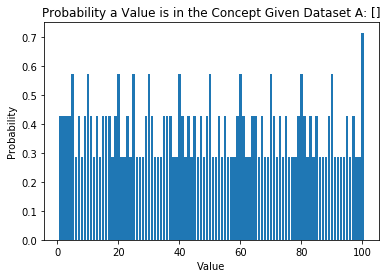

In [198]:
#creating final probabilities
#dataset a
plt.bar(range(1, 101), [post_prob(i, a, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset A: []')
plt.show()

This graph somewhat matches my intuition for the right answer: because the data set is empty, the size principle likelihood would always return a 1, which means that each concept has a roughly equal chance of being in the concept, and so the numbers that have a higher probability are the ones that show up the most frequently across all the hypotheses.

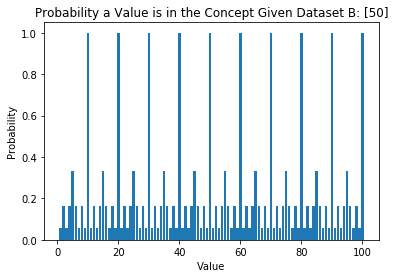

In [199]:
#creating final probabilities
#dataset b
plt.bar(range(1, 101), [post_prob(i, b, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset B: [50]')
plt.show()

This graph matches my intutition that the number 50 most closely belongs in the multiples of 10 concept, followed by the multiples of 5 concept, followed by even numbers. We can see that the multiples of 10 have the highest probability, and the multiples of 5 have the second highes probability, and so on.

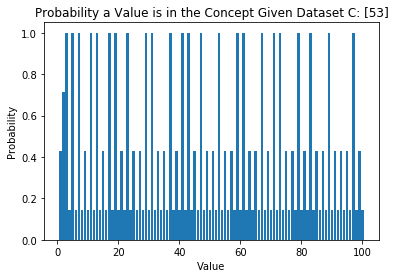

In [200]:
#creating final probabilities
#dataset c
plt.bar(range(1, 101), [post_prob(i, c, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset C: [53]')
plt.show()

This graph does match my intuition: I would believe that number 53 only would either belong to the primes hypothesis or the odds. Based on this graph, we see that the primes have the highest probability of also being the concept, and the odds have the second highest probability of being in the concept. 

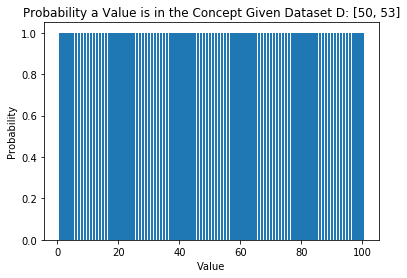

In [201]:
#creating final probabilities
#dataset d
plt.bar(range(1, 101), [post_prob(i, d, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset D: [50, 53]')
plt.show()

This graph also matches my intution of which hypothesis the dataset accepts: the only hypothesis that would match this dataset is the one with all numbers. We can see that this graph gives equal weight to all of the numbers, so it suggests that it came from H7.

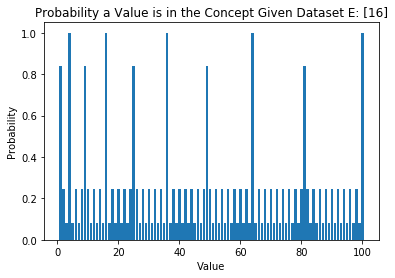

In [202]:
#creating final probabilities
#dataset e
plt.bar(range(1, 101), [post_prob(i, e, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset E: [16]')
plt.show()

This graph also matches my intuiton: I would believe that 16 would belong to the squares hypothesis, and bes less likely to be from the evens hypothesis. As we can see from this graph, the probabiliy spikes at square values (4, 16, 25), and has lower probability across all the evens. 

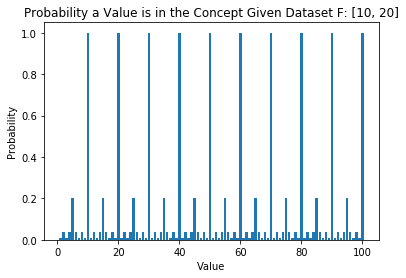

In [203]:
#creating final probabilities
#dataset f
plt.bar(range(1, 101), [post_prob(i, f, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset F: [10, 20]')
plt.show()

This graph matches my intuition that this dataset is most likely from the multiples of 10 hypothesis, second-most likely from the multiples of 5 hypothesis, and least likely to be from the evens hypothesis. We can see that the probability spikes at all multiples of 10, and the multiples of 5 have a significantly lower probability. 

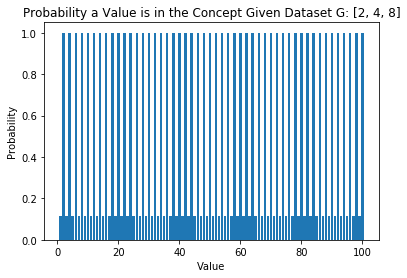

In [204]:
#creating final probabilities
#dataset g
plt.bar(range(1, 101), [post_prob(i, g, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset G: [2, 4, 8]')
plt.show()

This dataset looks like it would belong to either a dataset of all evens or a dataset from 1-100. This graph further supports that intution by showing that all even numbers have a high probability of also being in the concept, and all numbers have a significantly lower probability of being in the concept.

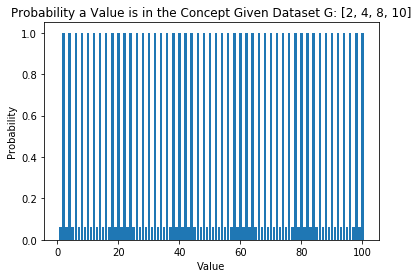

In [205]:
#creating final probabilities
#dataset h
plt.bar(range(1, 101), [post_prob(i, h, hypotheses) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset G: [2, 4, 8, 10]')
plt.show()

Similar to graph g, we can see that this dataset looks like it's most likely from an all evens concept or an all numbers concept. This is supported by the fact that all the even numbers have the highest probability, and the rest of the numbers have a lower probability of also being in the concept

## Question 3

In [206]:
#making all the ranges
temporary = []
for i in range(1, 101):
    for j in range(1, 101):
        if i == j:
            pass
        else:
            if j > i:
                temporary.append(range(i, j))
            elif i > j:
                temporary.append(range(j, i))
                
#remove duplicates
ranges = []
for el in temporary:
    if el not in ranges:
        ranges.append(el)

In [207]:
len(ranges)

4950

There are 4950 unique ranges that span across 1-100. If all of these are equally likely, that means each one has a 1/4950 chance of being selected, and these have a 1/8 prior, which means that out of all of the hypotheses, you have a 1/8 * 1/4950 = 1/39600 chance of picking one particular range.

In [208]:
#new hypotheses
hypotheses_q3 = [H1, H2, H3, H4, H5, H6, H7]
hypotheses_q3.extend(ranges)

In [209]:
#defining a new function to take into account new priors
def post_prob_q3(number, ds, hypo):
    #number from 1-100, ds = dataset, hypo = list of hypotheses
    denom = 0
    numerator = 0
    prior_regular = 1/8
    prior_new = (1/8)*(1/4950)
    idx = 0
    for hyp in hypo:
        if idx < 7:
            #these priors are 1/8
            if len(ds) == 0:
                denom += prior_regular
                if number in hyp:
                    numerator += prior_regular
            else:
                likelihood = size_principle_likelihood(ds, hyp)
                denom += likelihood * prior_regular
                if number in hyp:
                    numerator += likelihood * prior_regular
        else:
            #these priors use 1/8 * 1/4950
            if len(ds) == 0:
                denom += prior_new
                if number in hyp:
                    numerator += prior_new
            else:
                likelihood = size_principle_likelihood(ds, hyp)
                denom += likelihood * prior_new
                if number in hyp:
                    numerator += likelihood * prior_new
        idx += 1
    final = numerator/denom
    if denom == 0:
        final = 0
    return final
#test
post_prob_q3(100, a, hypotheses_q3)

0.6249999999999566

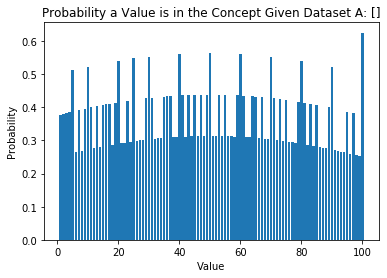

In [210]:
#dataset a
plt.bar(range(1, 101), [post_prob_q3(i, a, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset A: []')
plt.show()

With an empty dataset, all the hypotheses are equally likely, and the numbers that have higher probabilities are the ones that show up more frequently in the ranges. There appears to be a curve because numbers near 50 show up in more ranges because they are in the middle of the endpoints.

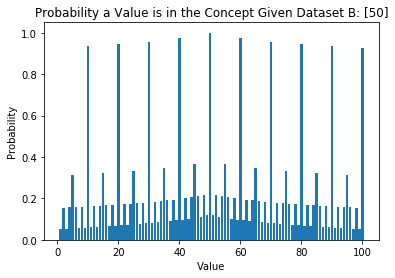

In [211]:
#dataset b
plt.bar(range(1, 101), [post_prob_q3(i, b, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset B: [50]')
plt.show()

Adding in the new ranges furthered my initial assumption that the dataset comes from a hypothesis that has an interval of 10. We see that the probabilities for each multiple of 10 have lowered down slightly, but they are still very high. We also see that curve pattern in the other numbers, because 50 is most commonly included in ranges, and so its neighboring numbers will also have a similar chance of being included in that range. That percentage decreases the further you move away from the middle.

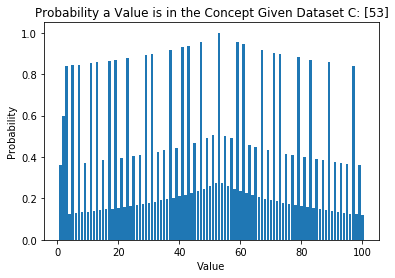

In [212]:
#dataset c
plt.bar(range(1, 101), [post_prob_q3(i, c, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset C: [53]')
plt.show()

This graph further supports my belief that 53 belongs to either a prime set or an odd set, followed by an all-number set. The probabilities of the prime numbers also being in the set are particularly high, and they follow a curve pattern to include ranges that neighbor the number 53. The further away a non-prime and non-odd number is from 53,the less likely it will be also included in the hypothesis.

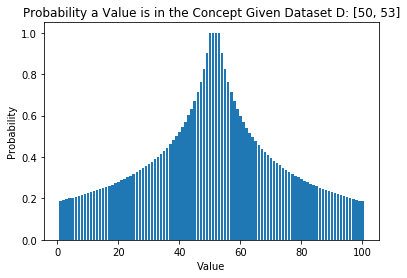

In [213]:
#dataset d
plt.bar(range(1, 101), [post_prob_q3(i, d, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset D: [50, 53]')
plt.show()

This graph looks significantly more different than the graph made in Q2 because we have included more ranges. Previously, I concluded that all numbers have an equal chance of being included because the only hypothesis that fit them was H7, but now with all the ranges, we can see that numbers in between 50 and 53, such as 51 and 52, also have a 100% chance of getting included in the range, because they are in between the numbers and would always be in a range that included both. We also see that as you move further away from the range 50 and 53, the probability that number is also included will decrease. This helps me better generalize that numbers closer to 50 and 53 will have a high chance of also being in the concept.

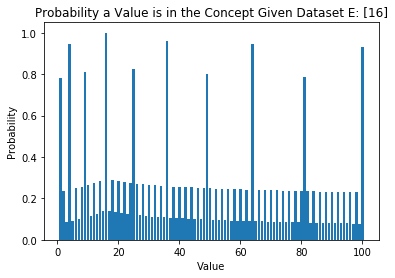

In [214]:
#dataset e
plt.bar(range(1, 101), [post_prob_q3(i, e, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset E: [16]')
plt.show()

This new graph strengthened my initial belief that a dataset with 16 most likely comes from a squares hypothesis, since square numbers have the highest probability. We also see that numbers close to 16 also have a slighlty higher chance of being included in the concept; however, it's not as drastic of a change as some of the other graphs.

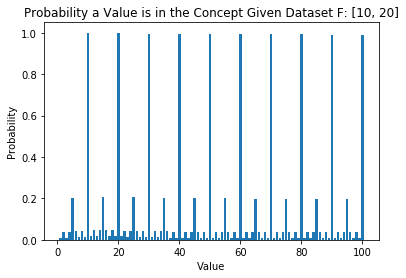

In [219]:
#dataset f
plt.bar(range(1, 101), [post_prob_q3(i, f, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset F: [10, 20]')
plt.show()

This graph looks very similar to the one made in Q2, which suggests that 10 and 20 belong to a concept that is multiples of 10. Because 10 and 20 are so far apart, fewer of the range-based hypotheses will include both, which could explain why there's little variation between graphs.

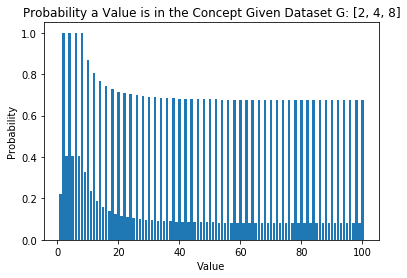

In [216]:
#dataset g
plt.bar(range(1, 101), [post_prob_q3(i, g, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset G: [2, 4, 8]')
plt.show()

Our intial hypotheses were pretty limited, so adding the new range-based hypotheses shows a curve that flattens out. Because 2, 4, and 8 are close to each other, the ranges that encompass 1-20 have the highest chance of being included in the concept. This solidified my intuition that 2, 4, and 8 should belong to an evens group, as the highest probabillites after the leveling off are evens.

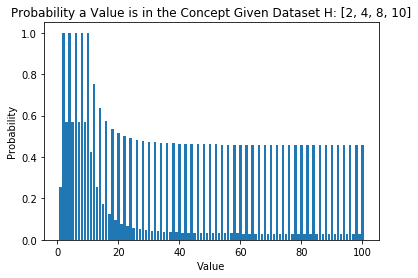

In [217]:
#dataset h
plt.bar(range(1, 101), [post_prob_q3(i, h, hypotheses_q3) for i in range(1, 101)])
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability a Value is in the Concept Given Dataset H: [2, 4, 8, 10]')
plt.show()

Similar to the dataset G, we see the same levelling off, but at a further number. The difference between this one and G was that we added 10, which solidified my intuition that 2, 4, and 8, and 10 should belong to an evens group, as the highest probabillites after the leveling off are evens. Having more ranges pushed all the probabilities lower so that I could see the true number probabilities.